# EDA - King County House Pricing

![](kCNAFTN.jpg)

### Introduction and Overview

The purpose of this EDA is to find insights into the King County House Market, by coming up with a minimum of three hypothesis, which we either confirm or discard during this EDA and allow us to make some stakeholder recommendations.

In this notebook we first start with setting up our environment, meaning we import necessary libraries and read our dataset into a dataframe to work with throughout this notebook.

As the second step, we use basic analysis methods to get some insight and understanding about our data. With this understanding we than move to the point of hypothesis generation, where at least 3 hypothesis are stated.
After we have our hypothesis defined, the next part is the data exploration, in which we check the distribution of the data feature to identify patterns or clues. In the next step, we clean and transform our data where needed and also drop columns if they do not provide valuable insight.
With this clean set of data, we then move on to explore the relationship of the features, find correlation between the features and maybe create new ones in order to drive our goal.

In the final step, the insight gained during this EDA will be transformed into a separate presentation with stakeholder recommendation, which will be summarized in the conclusion.

<br>

### Getting started

As a first step we will import the necessary python libraries and load the dataset from the CSV file. 

For the data handling we will mostly focus on pandas and numpy, while the visualisation will be done with either matplotlib or seaborn. Other libraries will not be used during this EDA.

In [394]:
import warnings

warnings.filterwarnings("ignore")

# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<br>




With a quick df.head() we will get our first view on the data.

In [395]:
# load the data into the df dataframe and printing the first five lines
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


<br>

### Understand your Data

We start by inspecting the data from a general perspective, so that we understand more about missing values, data types and the structure of the dataframe, before we get to the basic descriptive statistics.

In [396]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<br>
We can see that almost all our features have no missing values. Only waterfront, view and yr_renovated have some missing values, where view only has minor missing values, but waterfront and especially yr_renovated show quite a significant amount of NaN.

<br>
<br>

Further down the EDA we will evalaute how to treat this values and get more insights into the individual columns, for now let's have some more detailed look at the data types of our features, especially date, yr_built and yr_renovated.

In [397]:
print(df['date'].head())
print(df['yr_built'].unique())
print(df['yr_renovated'].unique())

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962.

<br>
As can be seen, the date column is currenty a type object. Thus, we likely convert this column later in this notebook into datetime objects in order to use this for timeseries analysis.

Additionally, we also aim to convert the yr_renovated to an int, so that it can be easily plotted, as they are currently in floats. But this will be handled in the Data Cleaning section further down the road.

To understand the dataset a bit better, we also will look at the overall duplicate entries, to see if some houses are continously sold and resold. This way we might be able to understand how flexible the market is and to recognize potential price increases overtime.

For this purpose we will check if some of the house IDs are reoccuring.

In [398]:
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

Only 177 entries are duplicates, giving only limited insight into the selling and re-selling possibilities in the Seattle market.

<br>

And last, but not least, let us have a look at the data again to find out which data is continous or categorical. and see if we might need to change some of these in the cleaning phase of the EDA. We do this by looking at the frequency of unique values to understand if they are used in a categorical sense.

In [399]:
df.nunique().sort_values()

waterfront           2
view                 5
condition            5
floors               6
grade               11
bedrooms            12
bathrooms           29
zipcode             70
yr_renovated        70
yr_built           116
sqft_basement      304
date               372
long               751
sqft_living15      777
sqft_above         942
sqft_living       1034
price             3622
lat               5033
sqft_lot15        8682
sqft_lot          9776
id               21420
dtype: int64

While most of the features by datatypes are not categorical, they are still used to classify (e.g. waterfront, view, condition, grade) and even the bedroom, bathrooms, and yr_built, yr_renovated could be used as categorical data, depending on requirements. Accordingly, we divid our data here into a first set of continous and categorical data for further processing.

In [400]:
continous = ['price', 'sqft_basement', 'date', 'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_lot15', 'sqft_lot', 'long', 'lat']
categorical = ['waterfront','view','condition','floors','grade', 'bedrooms','bathrooms','zipcode','yr_renovated','yr_built']

And last, but not least, we have a look at the basic descriptive statistics for all of our data features. However, for readability, the .describe() is called in two separate steps; once for the continous and once for the categorical data.

In [401]:
df.loc[:, continous].describe()

,price,sqft_living15,sqft_above,sqft_living,sqft_lot15,sqft_lot,long,lat
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,1986.62,1788.60,2080.32,12758.28,15099.41,-122.21,47.56
std,367368.14,685.23,827.76,918.11,27274.44,41412.64,0.14,0.14
min,78000.00,399.00,370.00,370.00,651.00,520.00,-122.52,47.16
25%,322000.00,1490.00,1190.00,1430.00,5100.00,5040.00,-122.33,47.47
50%,450000.00,1840.00,1560.00,1910.00,7620.00,7618.00,-122.23,47.57
75%,645000.00,2360.00,2210.00,2550.00,10083.00,10685.00,-122.12,47.68
max,7700000.00,6210.00,9410.00,13540.00,871200.00,1651359.00,-121.31,47.78


- price: especially when looking at the price, we can see that we have a very high range from min to max, and a huge standard deviation, where the max value needs to be verified in order to ensure that this is not an unwanted outlier.
- sqft_lot15: this feature also has a very wide range from min to max and a high standard deviation. However, as this column indicates the sqft_lot of the nearest 15 neighbours, this wide range can be explained due to different neighbourhood types (e.g. crowded city center vs. rural country-side)
- swft_lot: identical to the sqft_lot15, this feature is showing a wide range and thus a big standard edvation and will be evaluted more in detail during the cleaning process


<br>

### Hypothesis Generation

In this section we create some hypothesis to "guide" us through the next steps. We are trying to come up with wise assumptions, how certain features might affect our target variable and we will use this EDA to either confirm or disprove them and maybe even show new insights during this process. Thus, we assume:

- house pricing is clustered by ZIP codes / grouped by longitude & latitude  
    e.g. expensive houses can be mostly found in certain ZIP code areas
    
- the age of an house impacts the official grade and the score for the overall condition  
    e.g. the older an house, the lower the grade and overall condition
 
- the number of bedrooms has a higher imapct on the house pricing, than the number of bathrooms

<br>

### Getting a feel for the data

After having run some basic descriptive statistics on the dataset, let us have a first look at the distribution of the individual dataset features. 

As we do not have too many features, we have a look at the distribution of all of them and start by looking at the features which contain continous data. This is done by creating separate histograms for each of them.

As a short reminder, the following features have been classified as continous:
```
continous = ['price', 'sqft_basement', 'date', 'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_lot15', 'sqft_lot', 'long', 'lat']
```

<br>

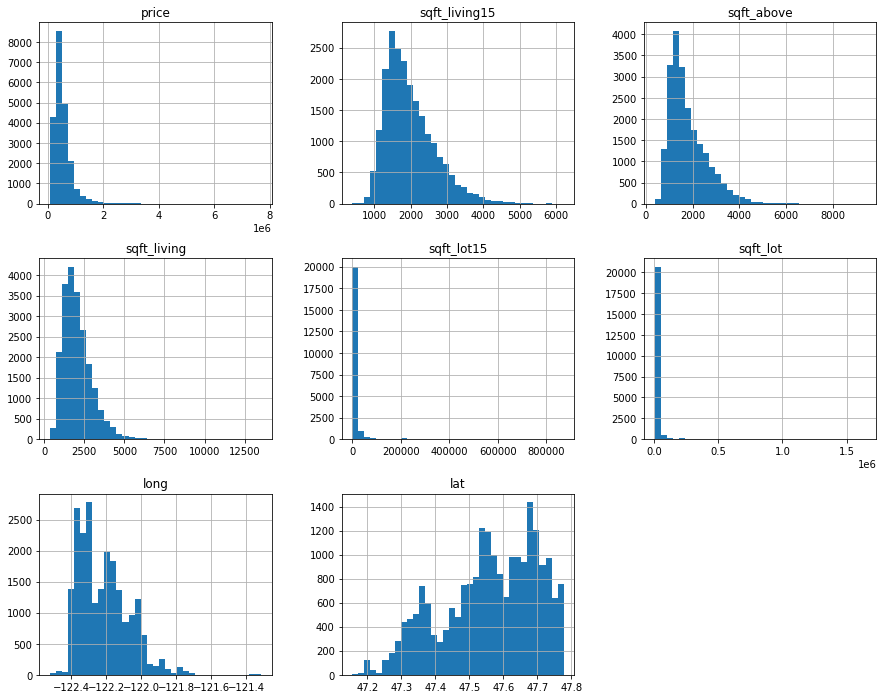

In [402]:
df.loc[:, continous].hist(figsize=(15,12), bins=35);

sqft_living, sqft_above and sqft_living15 have a very similar distribution, relatively in line with price. All features (besides long and lat) show a storng postive skewed distribution.


Next, let's have a look at the categorical data. For this purpose we are going to 

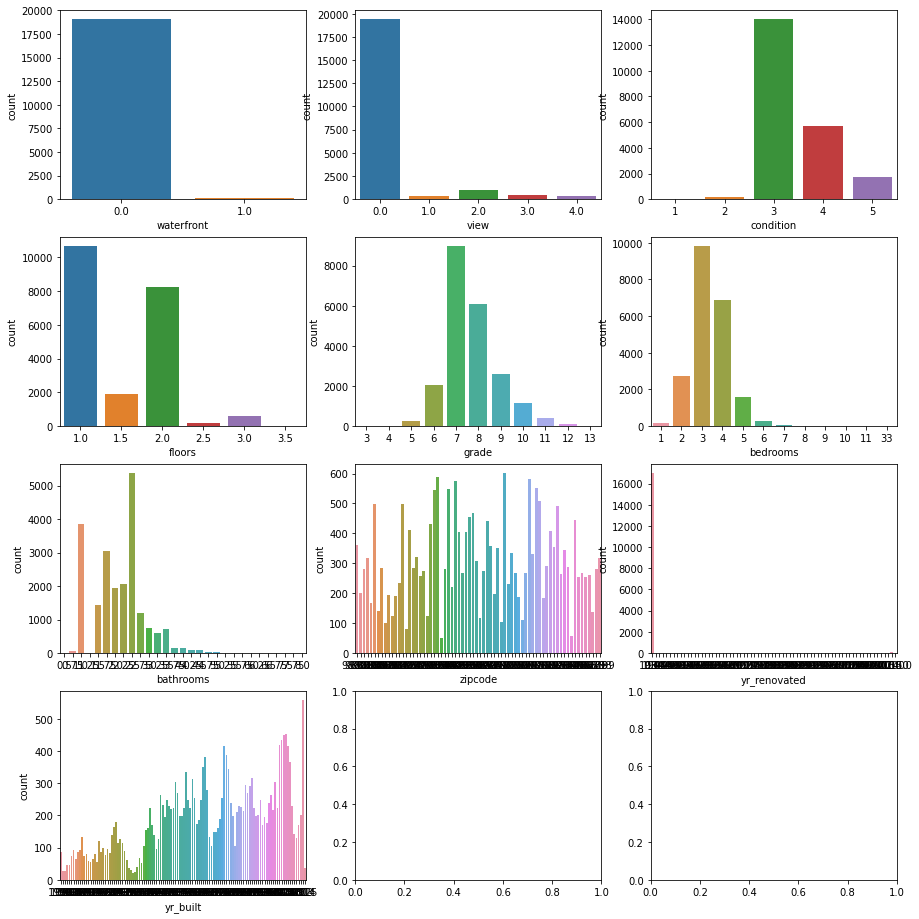

In [403]:
fig, ax = plt.subplots(4, 3, figsize=(15, 16))

counter = int(0)

for index, column in enumerate(categorical):
    sns.countplot(df[column], ax=ax[counter,(index % 3)])
    if index == 2 or index == 5 or index == 8:
        counter += 1
    

df['view'].value_counts()
df['waterfront'].value_counts();

The yr_renovated histogram is not really insightful as most of the data entries have a 0 listed when no renovation has been done. To get some insight into this feature we will shortly look at a dataframe solely consiting out of renovated houses.

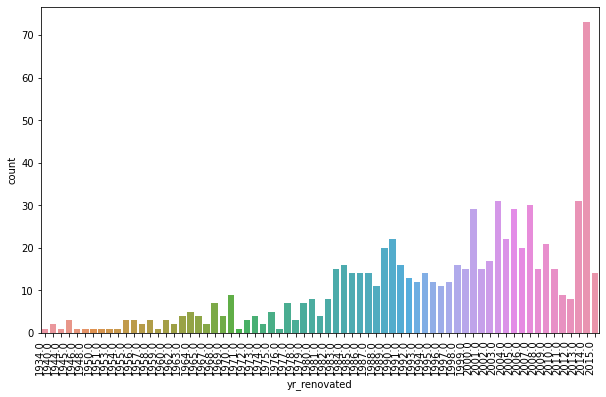

In [404]:
renovated_only = df[df['yr_renovated'] != 0]

plt.figure(figsize=(10,6))
a = sns.countplot(renovated_only['yr_renovated'])
a.set_xticklabels(a.get_xticklabels(), rotation=90, horizontalalignment='right');

As we are also interested about the geographical impact on the housing data set, we will also check this distribution using the longitute and latitude and directly highlighting the ZIP Code to get a bit of a feel for the city.

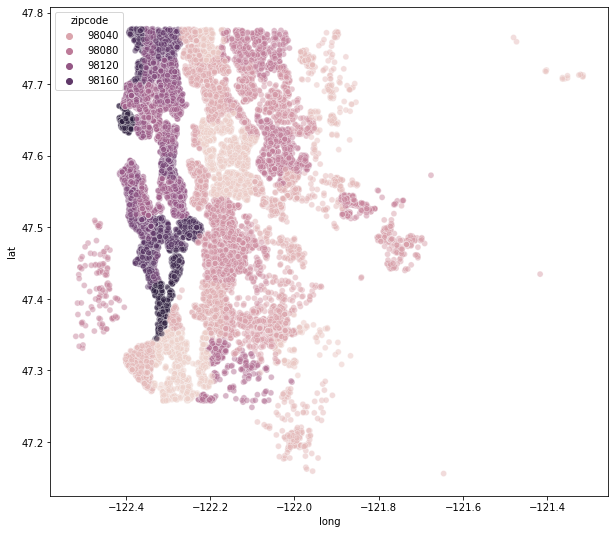

In [405]:
#print(df['zipcode'].unique())
plt.figure(figsize=(10, 9))
sns.scatterplot(y='lat', x='long', hue='zipcode', data=df, alpha=0.5);

<br>

### Data Cleaning and Data Transforming

As already noticed during the initial exploration phase, we have some column features that we have to treat with some additional attention in order to make them work for us.

First, we will transform the existing date column into an actual date time object, so that we potentially could do some date time analysis.

In [406]:
# transforming the date column into an datetime object
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [408]:
# transform price from float into int
df['price'] = df['price'].astype(int)

As we saw that for some of our features we have very big ranges, we also will have a look at the largest and smalles elements for the price, to make sure that these are not unwanted outliers.

In [409]:
display(df.nlargest(5, 'price'))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000,6,8.00,12050,27600,2.50,0.00,3.00,...,13,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000,5,4.50,10040,37325,2.00,1.00,2.00,...,11,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000,6,7.75,9890,31374,2.00,0.00,4.00,...,13,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000,5,5.75,9200,35069,2.00,0.00,0.00,...,13,6200,3000.0,2001,NaN,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000,5,5.00,8000,23985,2.00,0.00,4.00,...,12,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750


In [410]:
df.nsmallest(5, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,2014-05-06,78000,2,1.00,780,16344,1.00,0.00,0.00,...,5,780,0.0,1942,NaN,98168,47.47,-122.28,1700,10387
465,8658300340,2014-05-23,80000,1,0.75,430,5050,1.00,NaN,0.00,...,4,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500
16184,3028200080,2015-03-24,81000,2,1.00,730,9975,1.00,NaN,0.00,...,5,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
8267,3883800011,2014-11-05,82000,3,1.00,860,10426,1.00,0.00,0.00,...,6,860,0.0,1954,0.00,98146,47.50,-122.34,1140,11250
2139,1623049041,2014-05-08,82500,2,1.00,520,22334,1.00,0.00,0.00,...,5,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570


The largest as well as the smallest price values seem to be reasonable entries, which represent an house entry within the dataframe. Thus, we will not remove any outliers based on the max and min value.

<br>

However, we still have some columns which we need to check in regards to missing data:

In [411]:
# viewing the amount of null entries per column
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The view is quite irrelevant for us, but also only has a minor amount of missing data. However, as we are not using this column to get any insight, we will drop it in the next step.

The waterfront feature might be relevant for our stakeholder. Therefore we are keeping this column, but will replace the NaN values with the mode of this column. This means that we are replacing the NaNs with a 0, indicating that this house does not placed at the waterfront. As this is a relevant feature for our stakeholder, we rather treat missing data in this column as "not at the wanterfront" than recommending a wrong house.

As we are interested in the effect of the house age in regards to the housing price and the yr_renovated column might get interesting insights in this topic, we will not remove it. However, we also have many 0 values in there, which likely represent a non-renovated status and for this EDA we will interpret missing data in this column also as unrenovated.

In [412]:
# dropping unnecessary columns
df.drop('view', axis=1, inplace=True)

In [428]:
# replacing all NaNs with 0, which is the most common entry as well as the indication that this feature is not fullfilled.
df.fillna(0, inplace=True)
df.isnull().sum()

# additionally converting the yr_renovated into a int to fit in line with the yr_built column
df['yr_renovated'] = df['yr_renovated'].astype(int)

<br>

In addition to dropping columns, we might also think about adding some additional features, which are helping us to gain insight.


Thus, let us look at the price column again and plot this togehter with the sqft_living and sqft_lot. I assume that there will be a correlation between price and size, as logically speaking the bigger a house or a lot, the more expensive it will very likely be.

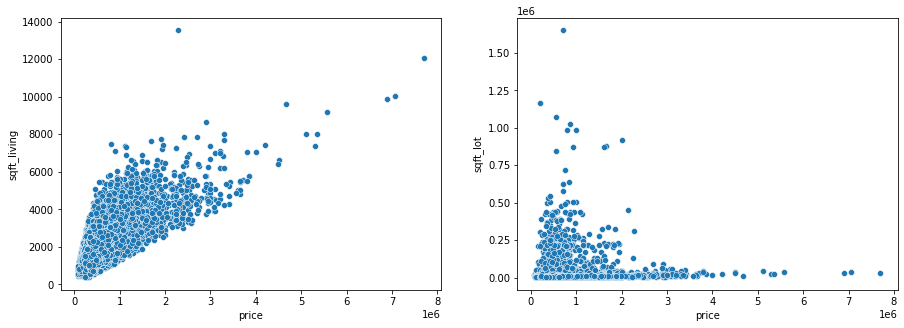

In [429]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.scatterplot(x='price', y='sqft_living', data=df, ax=ax[0])
sns.scatterplot(x='price', y='sqft_lot', data=df, ax=ax[1]);

While we can clearly see the correlation between living area and price, the correlation between lot size and price is not as clear. I assume that this is partly due to the outskirts area, where lot prices is a lot cheaper and not directly impacting the prices. We will look further into this during our hypothesis sections.

Still, we will take the opportunity here, to create two new columns 'price_per_sqft_living' and 'price_per_sqft_lot' in order to be able to compare different size houses.

In [430]:
df['price_per_sqft_living'] = df['price'] / df['sqft_living']
df['price_per_sqft_lot'] = df['price'] / df['sqft_lot']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,price_per_sqft_lot,age,last_renovation
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.00,0.00,3,...,0,98178,47.51,-122.26,1340,5650,188.05,39.27,67,2022.00
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.00,0.00,3,...,1991,98125,47.72,-122.32,1690,7639,209.34,74.29,71,31.00
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.00,0.00,3,...,0,98028,47.74,-122.23,2720,8062,233.77,18.00,89,2022.00
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.00,0.00,5,...,0,98136,47.52,-122.39,1360,5000,308.16,120.80,57,2022.00
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.00,0.00,3,...,0,98074,47.62,-122.05,1800,7503,303.57,63.12,35,2022.00


And finally we are adding two more columns in regard to the yr_built and yr_renovated, as we are directly interested into the age of a house and a potential time since the last renovation and how these features might impact the pricing. 

Thus, we will create two additional column, where the age (in years) since build and renovation will be stated for further insights.

In [440]:
df['age'] = pd.Timestamp.today().date().year - df['yr_built']
df['last_renovation'] = pd.Timestamp.today().date().year - df['yr_renovated']
print(df['last_renovation'].unique())

[2022   31   20   12   30    9   28   44   17   19   38   68    8   11
   39   77   32   34   45   41   27   22   23   24   52   33   18   36
   15   35   16   37   21   42   51   43   25   72   53   74   13    7
   48   14   54   10   59   71   60   69   29   26   67   40   66   82
   46   76   47   58   49   65   63   62   55   57   88   50   78   64]


In order to allign the format of the yr_renovated with the last_renovation column, the entries with value 2022 are replaced with 0. Thus, meaning that no renovation has been taken place for this property.

In [442]:
df['last_renovation'] = df['last_renovation'].replace({2022:0})

<br>

### Correlation

After cleaning and somewhat transforming the data, let us look a bit deeper into the correlation of the different features. 
We will do this with a basic correlation matrix and see if we can find assumed or unlikely correlations.

<AxesSubplot:>

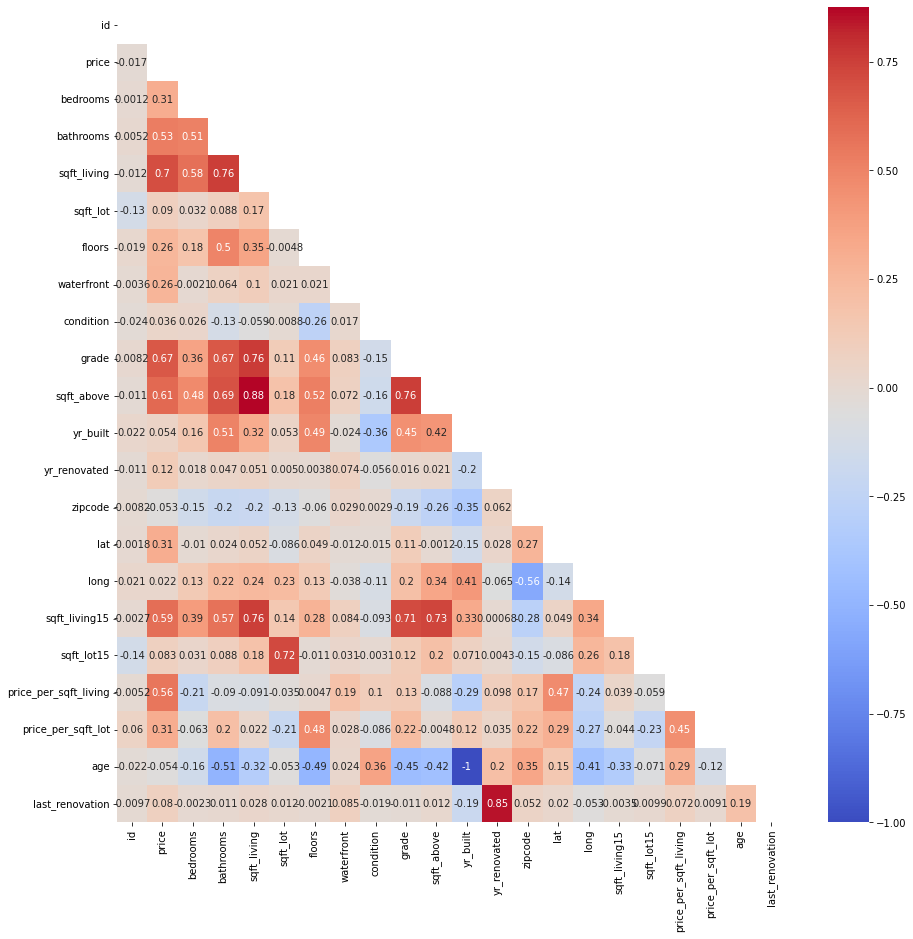

In [443]:
corr_mat = df.corr()
plt.figure(figsize=(15, 15))

matrix = np.triu(corr_mat.corr())

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', mask=matrix)

Unsurpisingly there is a strong correlation between the individual features describing either the size of the house, lot, basement or living area. 

Additionally, the grade shows a strong correlation with the price and size features, as well as the sqft_lot15, which is a parameter used, to indicate the size of the nearest 15 neighbours houses. Interestingly enough, there is no siginificant correlation between grade and sqft_lot15. This could be again an indicator of different feature significant for central and outskirt areas.

Price is another feature which shows some stronger correlation to the other features. Thus, before we move further into the data cleaning section, we generate some additional plots, trying to get more information about the features which show promising correlation.

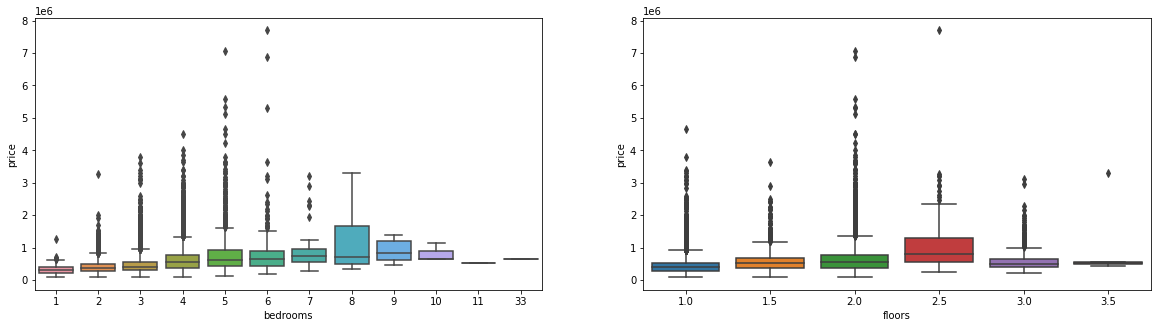

In [445]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

sns.boxplot(x='bedrooms', y='price', data=df, ax=ax[0])
sns.boxplot(x='floors', y='price', data=df, ax=ax[1]);

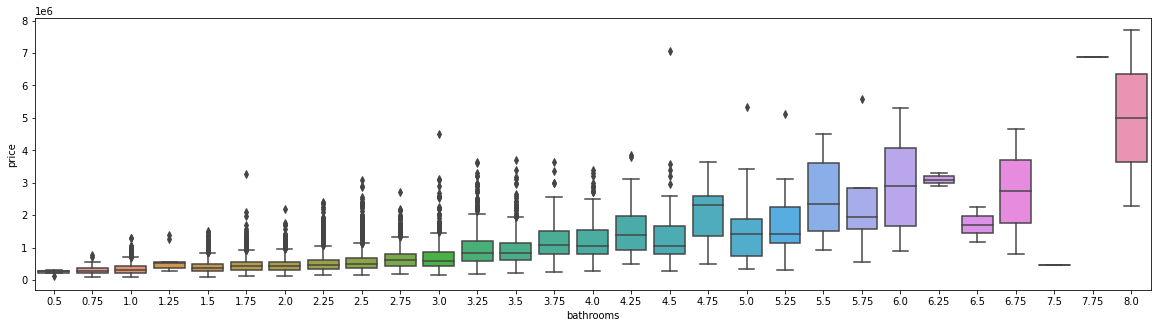

In [444]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='bathrooms', y='price', data=df);

### Data Transformation

test

In [351]:
df['yr_renovated'].value_counts()

0.00       17011
2014.00       73
2013.00       31
2003.00       31
2007.00       30
           ...  
1951.00        1
1953.00        1
1946.00        1
1976.00        1
1948.00        1
Name: yr_renovated, Length: 70, dtype: int64